In [19]:
import pandas as pd
from IPython.display import Image
from six import StringIO
import pydotplus

In [20]:
dataset=pd.read_csv('C:/Users/tengd/OneDrive/0-论文/dataset.csv')
dataset

,xid,xqmc,adress,usetype,built,county,zone,在售202311,在租202311,price202311,rate202311,在售202403,在租202403,price202403,rate202403,BaiduX,BaiduY,WGS84X,WGS84Y
0,2610156536,中粮祥云地铁小镇,蔡甸大街与西环路交叉口以西(地铁4号线新庙村..,住宅,2024年建成,蔡甸,蔡甸,69,0,7828.0,2.32%,40,0,6977,-1.35%,114.013123,30.586033,114.001108,30.582167
1,2610154872,华发峰尚,潘庙四路和潘庙大道交汇处,住宅,暂无资料,新洲,阳逻,4,0,7021.0,-2.43%,6,0,6565,-1.65%,114.589828,30.674473,114.578326,30.670861
2,2610153648,德雅国际城港澳湾,阳逻风情大道1号(柴泊湖旁),住宅,2018年建成,新洲,阳逻,4,0,6838.0,0.03%,7,0,6571,-0.17%,114.583931,30.685099,114.572405,30.681570
3,2610156206,城投秀水青城,青山区建设十一路青宜居车站旁,住宅,暂无资料,青山,红钢城,62,0,13281.0,4.68%,41,0,13009,0.83%,114.424080,30.651962,114.411937,30.648558
4,2610153928,招商一江璟城,和平大道建设六路(原13、14街坊),住宅,2019年建成,青山,红钢城,80,0,20336.0,1.66%,57,0,19787,-0.37%,114.403503,30.645493,114.391401,30.641868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6149,2610079220,普天居贤院,武汉龙阳大道217号(武汉外国语学校东侧),住宅,2004年建成,沌口,经开万达,0,1,9138.0,1.66%,0,1,8468,-3.12%,114.190605,30.525141,114.178460,30.521889
6150,2610161128,民警小区,蔡甸区沌口小区武汉市公安局蔡甸区分局宿舍1栋..,住宅,暂无资料,沌口,珠山湖大道,0,0,8174.0,3.00%,0,0,6583,-1.27%,114.142502,30.469315,114.130411,30.465440
6151,2611219198,联投金色港湾铂睿,博学路6号(江大5号门斜对面),住宅,2016年建成,沌口,三角湖,0,0,11806.0,2.00%,0,0,12035,1.00%,114.159882,30.523890,114.147721,30.520307
6152,2610670382,纸厂小区,沌口经济开发区建华小区旁边,住宅,1997年建成,沌口,经开万达,0,0,11465.0,-1.00%,0,0,11456,-3.00%,114.198265,30.465204,114.186195,30.461937


In [21]:
range_x=dataset['WGS84X'].max()-dataset['WGS84X'].min()
range_y=dataset['WGS84Y'].max()-dataset['WGS84Y'].min()
print(range_x)
print(range_y)

0.8686197000000107
0.6369052199999992


In [13]:
dataset['price202403'].max()

70843

In [22]:
dataset[['price202403']].boxplot()

<Axes: >

In [17]:
data=pd.DataFrame(dataset,columns=['price202403','WGS84X','WGS84Y','county'])
# data['price202403']=data['price202403']*0.000006
countys=list(data['county'].unique())
data_list=[]
for county in countys:
    data_list.append(data.loc[data['county']==county].drop(columns='county'))

In [34]:
import numpy as np
import scipy.sparse
data_matrix_list=[]
for data in data_list:
    data_matrix=scipy.sparse.csr_matrix(data.values)
    data_matrix_list.append(data_matrix)

In [35]:
from sklearn.cluster import KMeans

In [40]:
label_list=[]
for i in range(len(data_matrix_list)):
    data_matrix=data_matrix_list[i]
    label=KMeans(n_clusters=5,n_init=100).fit_predict(data_matrix)
    print(label)
    data_list[i]['label']=label

[4 1 3 1 4 3 4 4 1 1 1 4 1 1 2 4 1 1 0 1 4 1 1 1 4 4 3 1 4 0 1 1 1 4 4 1 1
 4 1 1 1 4 4 4 1 3 0 4 0 4 4 4 1 1 3 1 1 1 1 1 1 0 4 1 4 4 1 4 0 1 1 0 1 1
 1 4 4 0 3 4 4 0 1 1 4 4 1 1 0 4 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 4 4 4 1 4 1
 1 4 3 0 0 0 0 3 0 0 4 4 0 0 4 4 4 0 1 1 1 0 1 0 0 4 0 4 4 0 0 0 4 4 4 4 0
 4 4 4 4 4 0 0 0 4 0 0 4 4 1 4 4 0 0 4 0 4 1 1 4 0 0 0 4 0 4 4 4 1 0 0 0 4
 0 0 4 1 1 1 0 0 0 4 0 1 0 4 4 0 4 0 4 0 1 1 0 4 4 0 4 1 4 0 0 0 0 4 0 0 0
 0 0 1 4 4 0 0 0 1 1 4 4 3 1 4 4 4 1 4 4 4 4 0 0 0 0 0 1 1 4 4 1 4 3 1 4 0
 0 0 4 0 1 1 4 1 0 4 0 4 0 4 0 1 0 4]
[1 1 3 2 3 0 4 0 1 1 0 1 1 0 1 3 1 1 3 4 3 3 0 1 1 1 3 3 0 3 0 1 0 2 1 0 1
 3 1 2 2 1 0 3 4 0 3 4 1 2 3 0 4 1 0 2 3 4 1 3 4 0 0 2 4 0 0 4 3 2 4 1 3 3
 2 3 0 2 1 3 0 4 4 3 2 2 0 2 0 3 2 0 4 4 4 1 4 1 1 3 1 0 2 3 2 0 2 1 4 2 4
 0 0 3 2 3 0 2 3 0 1 1 1 1 0 1 1 0 0 2 1 2 2 4 2 0 2 1 1 0 2 2 4 0 0 0 0 2
 1 2 3 0 1 4 2 3]
[0 1 1 1 1 1 0 1 1 3 1 1 1 1 1 1 0 3 3 4 0 1 3 3 0 0 1 1 1 1 0 3 4 2 0 1 4
 4 2 3 0 3 1 0 4 0 0 3 1 1 0 4 3 4 0 3 0 0 0

In [42]:
import matplotlib.pyplot as plt
df=pd.concat(data_list,axis=0)
df.to_csv('C:/Users/tengd/OneDrive/0-论文/result_simpleKMeans_with_county.csv',index=False)
# data_matrix.shape

In [11]:
label0=data_matrix[label==0]
print(label0)

  (0, 0)	0.078054
  (0, 1)	114.4119372
  (0, 2)	30.64855806
  (1, 0)	0.11872200000000001
  (1, 1)	114.3914006
  (1, 2)	30.64186825
  (2, 0)	0.141342
  (2, 1)	114.3099984
  (2, 2)	30.65132526
  (3, 0)	0.136296
  (3, 1)	114.4003615
  (3, 2)	30.60995492
  (4, 0)	0.137634
  (4, 1)	114.4118659
  (4, 2)	30.60659887
  (5, 0)	0.13659000000000002
  (5, 1)	114.3709056
  (5, 2)	30.63637311
  (6, 0)	0.132408
  (6, 1)	114.3928233
  (6, 2)	30.64585007
  (7, 0)	0.143826
  (7, 1)	114.3407966
  (7, 2)	30.60950007
  (8, 0)	0.096246
  :	:
  (775, 2)	30.61823697
  (776, 0)	0.10705200000000001
  (776, 1)	114.3929947
  (776, 2)	30.63679577
  (777, 0)	0.082152
  (777, 1)	114.3896369
  (777, 2)	30.63582862
  (778, 0)	0.129996
  (778, 1)	114.3724854
  (778, 2)	30.63200295
  (779, 0)	0.06854400000000001
  (779, 1)	114.4178448
  (779, 2)	30.65023801
  (780, 0)	0.076752
  (780, 1)	114.3804587
  (780, 2)	30.62716421
  (781, 0)	0.075768
  (781, 1)	114.3955953
  (781, 2)	30.62672393
  (782, 0)	0.07875
  (782, 1)	114

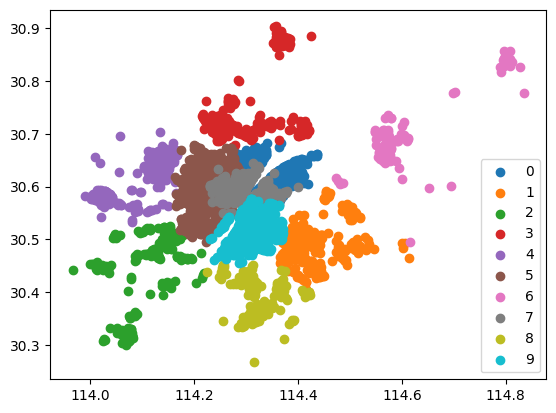

In [12]:
u_labels=np.unique(label)
for i in u_labels:
    label0=data_matrix[label==i]
    xs=label0[:,1].toarray()
    ys=label0[:,2].toarray()
    plt.scatter(xs,ys,label=i)
plt.legend()
plt.show()

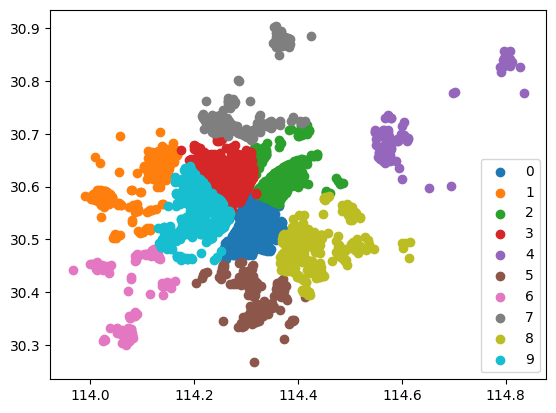

In [13]:
label_compare=KMeans(n_clusters=10,n_init=100).fit_predict(data_matrix[:,[1,2]])
u_labels=np.unique(label_compare)
for i in u_labels:
    label0=data_matrix[label_compare==i]
    xs=label0[:,1].toarray()
    ys=label0[:,2].toarray()
    plt.scatter(xs,ys,label=i)
plt.legend()
plt.show()

In [14]:
data.to_csv('C:/Users/tengd/OneDrive/0-论文/result.csv',index=False)

In [15]:
from scipy import stats

In [16]:
price_array=data['price202403'].to_numpy()
x_array=data['WGS84X'].to_numpy()
y_array=data['WGS84Y'].to_numpy()


In [17]:
price_array=stats.zscore(price_array)
x_array=stats.zscore(x_array)
y_array=stats.zscore(y_array)
data['zscore_price']=price_array
data['x_zscore']=x_array
data['y_zscore']=y_array

In [18]:
data

,price202403,WGS84X,WGS84Y,label,zscore_price,x_zscore,y_zscore
0,0.041862,114.001108,30.582167,4,-1.187853,-2.799137,0.130099
1,0.039390,114.578326,30.670861,6,-1.244551,2.832328,1.253919
2,0.039426,114.572405,30.681570,6,-1.243725,2.774559,1.389610
3,0.078054,114.411937,30.648558,0,-0.357756,1.209004,0.971324
4,0.118722,114.391401,30.641868,0,0.575003,1.008644,0.886559
...,...,...,...,...,...,...,...
6149,0.050808,114.178460,30.521889,5,-0.982668,-1.068855,-0.633666
6150,0.039498,114.130411,30.465440,2,-1.242074,-1.537625,-1.348922
6151,0.072210,114.147721,30.520307,2,-0.491793,-1.368748,-0.653711
6152,0.068736,114.186195,30.461937,2,-0.571473,-0.993385,-1.393298


In [19]:
data_zscore=data[['zscore_price','x_zscore','y_zscore']]
data_zscore

,zscore_price,x_zscore,y_zscore
0,-1.187853,-2.799137,0.130099
1,-1.244551,2.832328,1.253919
2,-1.243725,2.774559,1.389610
3,-0.357756,1.209004,0.971324
4,0.575003,1.008644,0.886559
...,...,...,...
6149,-0.982668,-1.068855,-0.633666
6150,-1.242074,-1.537625,-1.348922
6151,-0.491793,-1.368748,-0.653711
6152,-0.571473,-0.993385,-1.393298


C:\Users\tengd\AppData\Local\Temp\ipykernel_13184\1168617785.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_zscore['label']=zscore_label


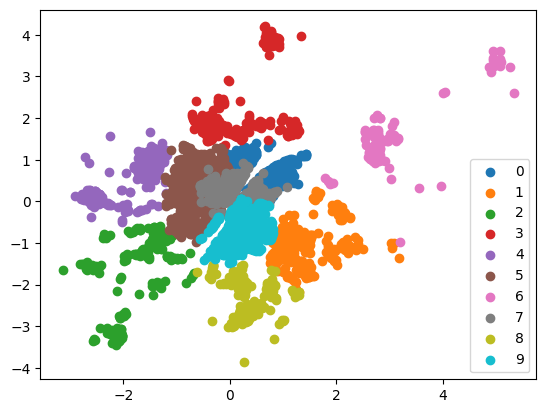

In [20]:
data_zscore_matrix=scipy.sparse.csr_matrix(data_zscore.values)
zscore_label=KMeans(n_clusters=10,n_init=100).fit_predict(data_zscore_matrix)
data_zscore['label']=zscore_label
u_zscore_labels=np.unique(zscore_label)
for i in u_zscore_labels:
    label0=data_zscore_matrix[label==i]
    xs=label0[:,1].toarray()
    ys=label0[:,2].toarray()
    plt.scatter(xs,ys,label=i)
plt.legend()
plt.show()

In [21]:
data_zscore.to_csv('C:/Users/tengd/OneDrive/0-论文/result_zscore.csv',index=False)

In [22]:
data2=pd.DataFrame(dataset,columns=['price202403','WGS84X','WGS84Y','county'])
#data2是用于测试提前按照区域分化后再使用K均值的算法的dataframe数据集
data2['price202403']=data2['price202403']*0.000006

In [23]:
county_unique=data2['county'].unique()
county_unique

array(['蔡甸', '新洲', '青山', '江夏', '黄陂', '硚口', '武昌', '汉阳', '东西湖', '江岸', '洪山',
       '东湖高新区', '汉南', '沌口', '江汉'], dtype=object)

In [24]:
datalist=[]
for county in county_unique:
    countylist=data2.loc[data2['county']==county]
    datalist.append(countylist)

In [25]:
data2

,price202403,WGS84X,WGS84Y,county
0,0.041862,114.001108,30.582167,蔡甸
1,0.039390,114.578326,30.670861,新洲
2,0.039426,114.572405,30.681570,新洲
3,0.078054,114.411937,30.648558,青山
4,0.118722,114.391401,30.641868,青山
...,...,...,...,...
6149,0.050808,114.178460,30.521889,沌口
6150,0.039498,114.130411,30.465440,沌口
6151,0.072210,114.147721,30.520307,沌口
6152,0.068736,114.186195,30.461937,沌口


In [26]:
j=0
result_arr=[]
for i in datalist:
    price_array=i['price202403'].to_numpy()
    x_array=i['WGS84X'].to_numpy()
    y_array=i['WGS84Y'].to_numpy()
    price_array=stats.zscore(price_array)
    x_array=stats.zscore(x_array)
    y_array=stats.zscore(y_array)
    i['zscore_price']=price_array
    i['x_zscore']=x_array
    i['y_zscore']=y_array
    temp=i[['zscore_price','x_zscore','y_zscore']]
    data_matrix=scipy.sparse.csr_matrix(temp.values)
    label_compare=KMeans(n_clusters=5,n_init=100).fit_predict(data_matrix[:,[0,2]])+j*5
    result_arr.extend(label_compare)
    j=j+1
u_labels=np.unique(result_arr)



C:\Users\tengd\AppData\Local\Temp\ipykernel_13184\158119566.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['zscore_price']=price_array
C:\Users\tengd\AppData\Local\Temp\ipykernel_13184\158119566.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['x_zscore']=x_array
C:\Users\tengd\AppData\Local\Temp\ipykernel_13184\158119566.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

C:\Users\tengd\AppData\Local\Temp\ipykernel_13184\158119566.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['zscore_price']=price_array
C:\Users\tengd\AppData\Local\Temp\ipykernel_13184\158119566.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['x_zscore']=x_array
C:\Users\tengd\AppData\Local\Temp\ipykernel_13184\158119566.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [27]:
len(result_arr)

6154

In [28]:
data2

,price202403,WGS84X,WGS84Y,county
0,0.041862,114.001108,30.582167,蔡甸
1,0.039390,114.578326,30.670861,新洲
2,0.039426,114.572405,30.681570,新洲
3,0.078054,114.411937,30.648558,青山
4,0.118722,114.391401,30.641868,青山
...,...,...,...,...
6149,0.050808,114.178460,30.521889,沌口
6150,0.039498,114.130411,30.465440,沌口
6151,0.072210,114.147721,30.520307,沌口
6152,0.068736,114.186195,30.461937,沌口


In [29]:
data2_matrix=scipy.sparse.csr_matrix(data2[['price202403','WGS84X','WGS84Y']].values)
#因为汉字无法转为矩阵，所以把区域剔除

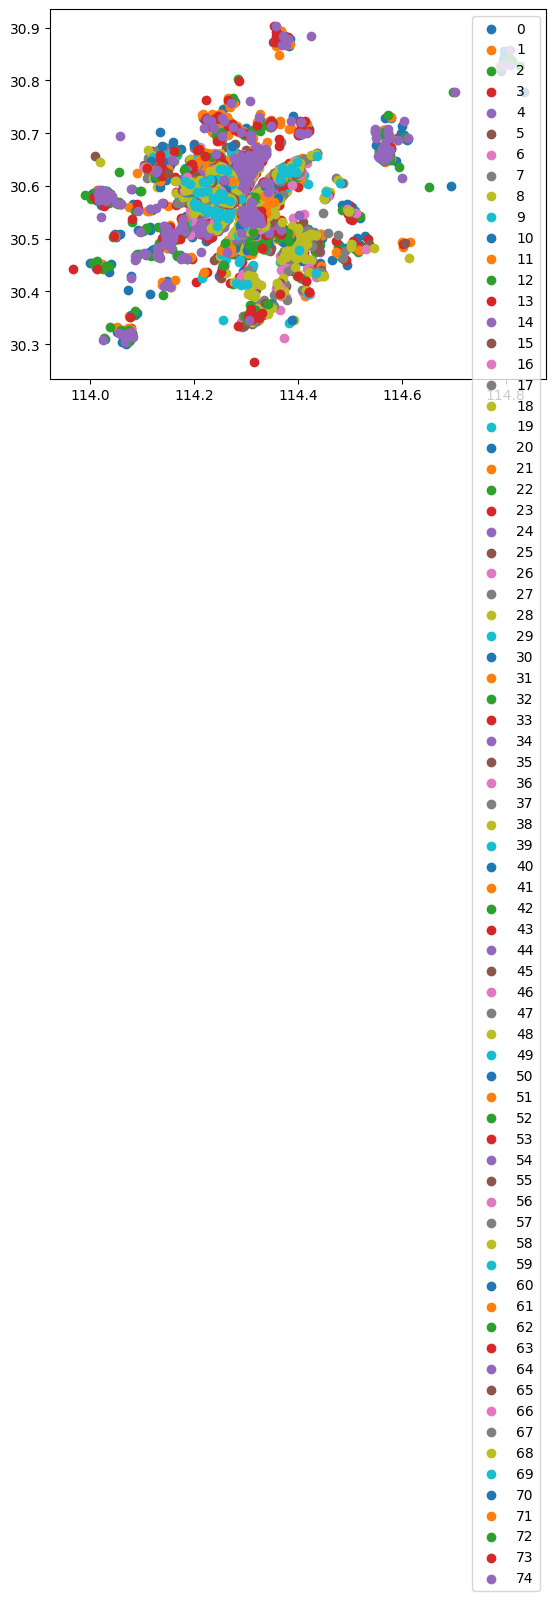

In [30]:
data2['label']=result_arr
for i in u_labels:
    label0=data2_matrix[result_arr==i]
    xs=label0[:,1].toarray()
    ys=label0[:,2].toarray()
    plt.scatter(xs,ys,label=i)
plt.legend()
plt.show()

In [31]:
data2=data2.drop(columns=['county'])

In [32]:
data2.to_csv('C:/Users/tengd/OneDrive/0-论文/result_conty.csv',index=False)